In [195]:
pip install algorithmia

In [197]:
import Algorithmia

input = {
  "domains": "cnn.com",
  "topic": "politics",
  "q": "",
  "qInTitle": "",
  "content": "false",
  "page": "1",
  "author_only": "true"
}
client = Algorithmia.client('APIkey')
algo = client.algo('specrom/Historical_News_API/0.2.2')
algo.set_options(timeout=300) # optional

In [2]:
print(algo.pipe(input).result['Article'][0])

{'author': '["Analysis by Zachary B. Wolf, CNN"]', 'description': 'Days to the election: 4 as of Friday', 'publishedAt': '2020-10-30', 'source_name': 'CNN', 'source_url': 'cnn.com', 'title': "What Matters: We made it to the Friday before Election Day. Here's what to know - CNNPolitics", 'url': 'https://www.cnn.com/2020/10/30/politics/what-matters-october-29/index.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+rss%2Fcnn_allpolitics+%28RSS%3A+CNN+-+Politics%29', 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/201029182555-early-voting-iowa-1029-super-tease.jpg'}


In [198]:
import pandas as pd
x = {'title':[],'desc':[],'year':[]}

In [199]:
a = algo.pipe(input).result['Article']
for i in range(900):
  if a[i]['title'] != "" and a[i]['description'] != "":
    x['title'].append(a[i]['title'])
    x['desc'].append(a[i]['description'])
    x['year'].append(a[i]['publishedAt'])
    print(a[i])

{'author': '["Curt Devine, Amitoj Singh and Caroline Kelly, CNN"]', 'description': "Republicans in Florida's most populous county, Miami-Dade, are turning out to vote at a somewhat higher percentage than Democrats -- causing uneasiness among some Democratic operatives.", 'publishedAt': '2020-10-31', 'source_name': 'CNN', 'source_url': 'cnn.com', 'title': 'Democrats uneasy about higher Republican turnout in important Florida county\r\r\r\r\r\r\r\n - CNNPolitics', 'url': 'https://www.cnn.com/2020/10/30/politics/democrats-uneasy-higher-republican-turnout-miami-dade/index.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+rss%2Fcnn_allpolitics+%28RSS%3A+CNN+-+Politics%29', 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/201030092559-01-trump-biden-split-1029-florida-super-tease.jpg'}
{'author': '["Caralyn Ryan, CNN"]', 'description': "Lester Young will be voting for the first time at age 48. He's ready to wait in line on Election Day, and he'll arrive with several other 

In [200]:
df = pd.DataFrame(x)
df.head(5)

,title,desc,year
0,Democrats uneasy about higher Republican turno...,"Republicans in Florida's most populous county,...",2020-10-31
1,Formerly incarcerated man and first-time voter...,Lester Young will be voting for the first time...,2020-10-31
2,Opinion: A powerful way for the GOP to show th...,A conservative group's ill-advised legal chall...,2020-10-31
3,Democrats uneasy about higher Republican turno...,"Republicans in Florida's most populous county,...",2020-10-31
4,US records its highest single-day record for C...,"There have been 89,361 daily new coronavirus c...",2020-10-31


In [201]:
pip install nltk

In [202]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [203]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
ADDITIONAL_STOPWORDS = ['cnn','cnnpolitics']

import matplotlib.pyplot as plt

In [204]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [205]:
def basic_clean(text):
  
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [206]:
words = basic_clean(''.join(str(df['title'].tolist())))

In [207]:
words[:20]

['democrat',
 'uneasy',
 'higher',
 'republican',
 'turnout',
 'important',
 'florida',
 'countyrrrrrrrn',
 'formerly',
 'incarcerated',
 'man',
 'firsttime',
 'voter',
 'energizes',
 'others',
 'cast',
 'ballot',
 'opinion',
 'powerful',
 'way']

In [208]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(election, day)       82
(u, election)         50
(2020, election)      32
(election, result)    30
(election, 2020)      30
(fact, check)         26
(donald, trump)       21
(wall, street)        19
(white, house)        18
(trump, campaign)     17
dtype: int64

In [209]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(u, election, 2020)           18
(2020, latest, news)          13
(black, life, matter)         10
(key, battleground, state)     9
(election, result, 2020)       9
(biden, trump, voting)         8
(latest, news, biden)          8
(election, 2020, latest)       8
(wall, street, got)            8
(news, biden, trump)           8
dtype: int64

In [210]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]

In [211]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

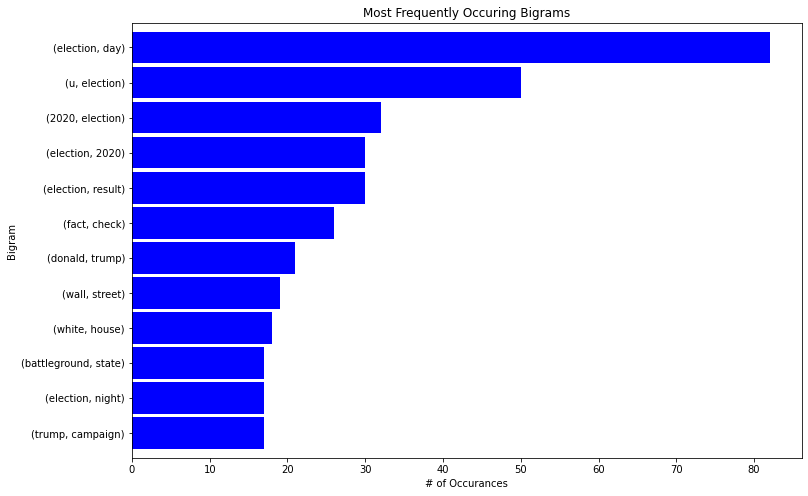

In [212]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [213]:

#IMPORTING LIBRARIES AND TOOLS

import pandas as pd
from wordcloud import WordCloud
from textblob import TextBlob
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [214]:
df.shape

(897, 3)

In [215]:
df.describe()

,title,desc,year
count,897,897,897
unique,337,326,7
top,"US election 2020: Latest news on Biden, Trump ...",Donald Trump and Joe Biden each need 270 elect...,2020-11-04
freq,8,12,187


In [216]:


def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def remove_splchr(text):    
    text=re.sub(r'[^a-zA-Z0-9\s]',' ',text)
    return text
    
def denoise_text(text):
    text = remove_between_square_brackets(text)
    text = remove_splchr(text)
    return text   
df['title']=df['title'].apply(denoise_text)
df.head(5)

,title,desc,year
0,Democrats uneasy about higher Republican turno...,"Republicans in Florida's most populous county,...",2020-10-31
1,Formerly incarcerated man and first time voter...,Lester Young will be voting for the first time...,2020-10-31
2,Opinion A powerful way for the GOP to show th...,A conservative group's ill-advised legal chall...,2020-10-31
3,Democrats uneasy about higher Republican turno...,"Republicans in Florida's most populous county,...",2020-10-31
4,US records its highest single day record for C...,"There have been 89,361 daily new coronavirus c...",2020-10-31


In [217]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [218]:
st_words=set(stopwords.words('english'))
st_words.update(['cnnpolitics','CNN','one','also','still','however','become'])
def rem_stopwrds(text):
    word_tokens=word_tokenize(text)
    word_tokens=[t.strip() for t in word_tokens]
    filtered=[w for w in word_tokens if w.lower() not in st_words]
    text=' '.join(filtered)
    return text
df['title']=df['title'].apply(rem_stopwrds)
df.head(5)

,title,desc,year
0,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31
1,Formerly incarcerated man first time voter ene...,Lester Young will be voting for the first time...,2020-10-31
2,Opinion powerful way GOP show care voting CNN,A conservative group's ill-advised legal chall...,2020-10-31
3,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31
4,US records highest single day record Covid 19 ...,"There have been 89,361 daily new coronavirus c...",2020-10-31


In [219]:
b=df['title']

In [220]:
def sentiment(text):
    senti =TextBlob(text)
    return senti.sentiment

df['polarity']=df['title'].apply(sentiment).apply(lambda b: b[0])

df.head(10)

,title,desc,year,polarity
0,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
1,Formerly incarcerated man first time voter ene...,Lester Young will be voting for the first time...,2020-10-31,0.125000
2,Opinion powerful way GOP show care voting CNN,A conservative group's ill-advised legal chall...,2020-10-31,0.300000
3,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
4,US records highest single day record Covid 19 ...,"There have been 89,361 daily new coronavirus c...",2020-10-31,-0.071429
5,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
6,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
7,Florida officials stop attempt register dead p...,Florida elections and law enforcement official...,2020-10-31,-0.200000
8,USPS announces extraordinary measures deliver ...,The US Postal Service on Friday announced seve...,2020-10-31,0.333333
9,Walter Wallace Jr police shooting body cam foo...,Body camera footage of the moments leading up ...,2020-10-31,0.000000


In [221]:
def categories(pol):
    if pol>0.01:
        return 'positive'
    else:
        return 'negative'
    
df['pd_sentiment']=df['polarity'].apply(categories)
df.head(10)

,title,desc,year,polarity,pd_sentiment
0,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000,positive
1,Formerly incarcerated man first time voter ene...,Lester Young will be voting for the first time...,2020-10-31,0.125000,positive
2,Opinion powerful way GOP show care voting CNN,A conservative group's ill-advised legal chall...,2020-10-31,0.300000,positive
3,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000,positive
4,US records highest single day record Covid 19 ...,"There have been 89,361 daily new coronavirus c...",2020-10-31,-0.071429,negative
5,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000,positive
6,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000,positive
7,Florida officials stop attempt register dead p...,Florida elections and law enforcement official...,2020-10-31,-0.200000,negative
8,USPS announces extraordinary measures deliver ...,The US Postal Service on Friday announced seve...,2020-10-31,0.333333,positive
9,Walter Wallace Jr police shooting body cam foo...,Body camera footage of the moments leading up ...,2020-10-31,0.000000,negative


In [222]:
pos_riv=df[df['pd_sentiment']=='positive']
pos_riv=pos_riv[pos_riv['polarity']>0.2]
print(pos_riv)
print(len(pos_riv))

                                                 title  ... pd_sentiment
0    Democrats uneasy higher Republican turnout imp...  ...     positive
2        Opinion powerful way GOP show care voting CNN  ...     positive
3    Democrats uneasy higher Republican turnout imp...  ...     positive
5    Democrats uneasy higher Republican turnout imp...  ...     positive
6    Democrats uneasy higher Republican turnout imp...  ...     positive
..                                                 ...  ...          ...
867  four years Trump Sleepy Joe sounds fine Wall S...  ...     positive
881  Trump GOP lawsuits thus far challenging ballot...  ...     positive
883  four years Trump Sleepy Joe sounds fine Wall S...  ...     positive
887  GOP lawsuits thus far challenging ballots proo...  ...     positive
888  GOP lawsuits thus far challenging ballots proo...  ...     positive

[148 rows x 5 columns]
148


In [223]:
pos_riv.drop('pd_sentiment',axis=1)

,title,desc,year,polarity
0,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
2,Opinion powerful way GOP show care voting CNN,A conservative group's ill-advised legal chall...,2020-10-31,0.300000
3,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
5,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
6,Democrats uneasy higher Republican turnout imp...,"Republicans in Florida's most populous county,...",2020-10-31,0.325000
...,...,...,...,...
867,four years Trump Sleepy Joe sounds fine Wall S...,"During the 2020 campaign, President Donald Tru...",2020-11-06,0.416667
881,Trump GOP lawsuits thus far challenging ballot...,President Donald Trump and the Republican Nati...,2020-11-06,0.300000
883,four years Trump Sleepy Joe sounds fine Wall S...,"During the 2020 campaign, President Donald Tru...",2020-11-06,0.416667
887,GOP lawsuits thus far challenging ballots proo...,President Donald Trump and the Republican Nati...,2020-11-06,0.300000


In [224]:

#negative
neg_riv=df[df['pd_sentiment']=='negative']
neg_riv=neg_riv[neg_riv['polarity']<0]
print(neg_riv)
print(neg_riv)

                                                 title  ... pd_sentiment
4    US records highest single day record Covid 19 ...  ...     negative
7    Florida officials stop attempt register dead p...  ...     negative
11   Florida officials stop attempt register dead p...  ...     negative
19   Florida officials stop attempt register dead p...  ...     negative
27   Fact check Seven kinds dishonesty expect late ...  ...     negative
..                                                 ...  ...          ...
859  Fact check Breaking barrage false election cla...  ...     negative
860  Fact check Donald Trump delivers dishonest spe...  ...     negative
864    Democratic Congresswoman spoke hard truth party  ...     negative
866    Democratic Congresswoman spoke hard truth party  ...     negative
869    Democratic Congresswoman spoke hard truth party  ...     negative

[140 rows x 5 columns]
                                                 title  ... pd_sentiment
4    US records highest sin

In [225]:
neg_riv.drop('pd_sentiment',axis=1)

,title,desc,year,polarity
4,US records highest single day record Covid 19 ...,"There have been 89,361 daily new coronavirus c...",2020-10-31,-0.071429
7,Florida officials stop attempt register dead p...,Florida elections and law enforcement official...,2020-10-31,-0.200000
11,Florida officials stop attempt register dead p...,Florida elections and law enforcement official...,2020-10-31,-0.200000
19,Florida officials stop attempt register dead p...,Florida elections and law enforcement official...,2020-10-31,-0.200000
27,Fact check Seven kinds dishonesty expect late ...,President Donald Trump is closing his campaign...,2020-10-31,-0.300000
...,...,...,...,...
859,Fact check Breaking barrage false election cla...,"On Twitter and on television, President Donald...",2020-11-06,-0.400000
860,Fact check Donald Trump delivers dishonest spe...,President Donald Trump delivered the most dish...,2020-11-06,-0.300000
864,Democratic Congresswoman spoke hard truth party,On a call with her colleagues Thursday -- less...,2020-11-06,-0.291667
866,Democratic Congresswoman spoke hard truth party,On a call with her colleagues Thursday -- less...,2020-11-06,-0.291667


In [226]:
all_positive=" ".join(pos_riv['title'])

In [227]:
po_wcloud=WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = st_words, 
                min_font_size = 10).generate(all_positive)

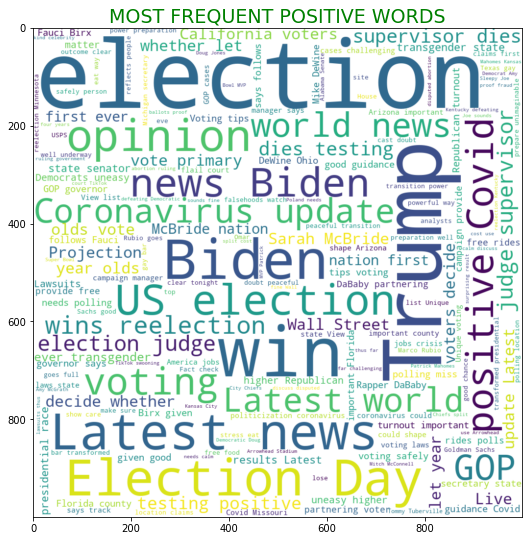

In [228]:
plt.figure(figsize=(12,9))
plt.title("MOST FREQUENT POSITIVE WORDS",fontdict={'color':"green",'fontsize':19})
plt.imshow(po_wcloud,interpolation='bilinear')
plt.show()


In [229]:
all_negative=" ".join(neg_riv['title'])

In [230]:
neg_wcloud=WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = st_words, 
                min_font_size = 10).generate(all_negative)

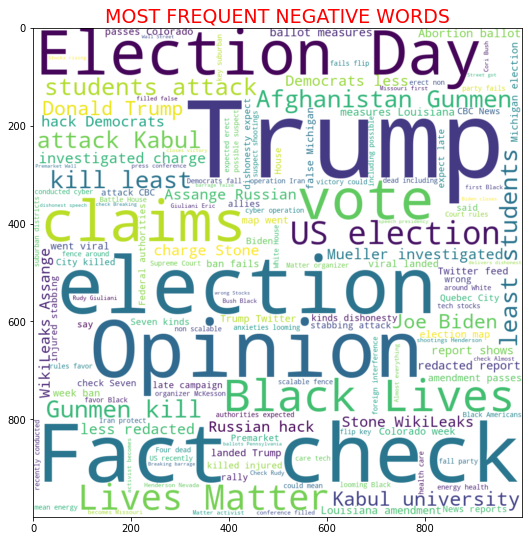

In [231]:
plt.figure(figsize=(12,9))
plt.title("MOST FREQUENT NEGATIVE WORDS",fontdict={'color':'red','fontsize':19})
plt.imshow(neg_wcloud,interpolation='bilinear')
plt.show()